In [1445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

data = pd.read_csv("AMZN.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6511,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


In [1446]:
data=data[['Date',"Close"]]
dates=data['Date']
data.set_index('Date')

,Close
Date,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354
...,...
2023-03-30,102.000000
2023-03-31,103.290001
2023-04-03,102.410004


<AxesSubplot:>

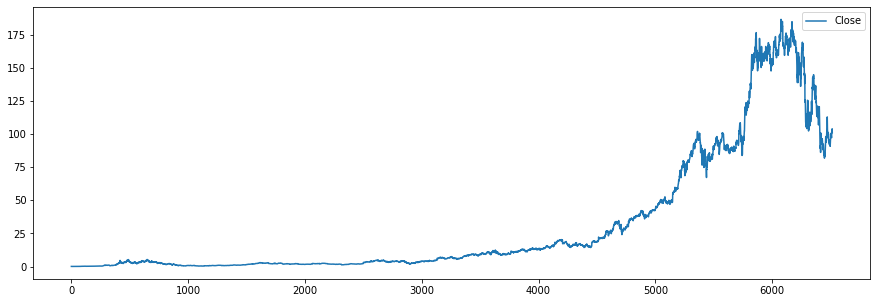

In [1447]:
data.plot(figsize=(15,5))

In [1448]:
from copy import deepcopy as dc 

def prepare_df(df,lookback):
    df=dc(df)
    
    for i in range(1, lookback+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

lookback=14
df=prepare_df(data,lookback)
df = df.set_index("Date")
df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10),Close(t-11),Close(t-12),Close(t-13),Close(t-14)
Date,,,,,,,,,,,,,,,
1997-06-05,0.077083,0.070833,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-06-06,0.082813,0.077083,0.070833,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-06-09,0.084375,0.082813,0.077083,0.070833,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-06-10,0.079167,0.084375,0.082813,0.077083,0.070833,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-11,0.077083,0.079167,0.084375,0.082813,0.077083,0.070833,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001,97.709999,98.949997,100.040001,96.199997,94.879997,92.430000,90.730003
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001,97.709999,98.949997,100.040001,96.199997,94.879997,92.430000
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001,97.709999,98.949997,100.040001,96.199997,94.879997


In [1449]:
df_as_np=df.to_numpy()
df_as_np

array([[7.70830000e-02, 7.08330000e-02, 7.39580000e-02, ...,
        8.54170000e-02, 8.64580000e-02, 9.79170000e-02],
       [8.28130000e-02, 7.70830000e-02, 7.08330000e-02, ...,
        8.17710000e-02, 8.54170000e-02, 8.64580000e-02],
       [8.43750000e-02, 8.28130000e-02, 7.70830000e-02, ...,
        7.13540000e-02, 8.17710000e-02, 8.54170000e-02],
       ...,
       [1.02410004e+02, 1.03290001e+02, 1.02000000e+02, ...,
        1.00040001e+02, 9.61999970e+01, 9.48799970e+01],
       [1.03949997e+02, 1.02410004e+02, 1.03290001e+02, ...,
        9.89499970e+01, 1.00040001e+02, 9.61999970e+01],
       [1.01099998e+02, 1.03949997e+02, 1.02410004e+02, ...,
        9.77099990e+01, 9.89499970e+01, 1.00040001e+02]])

In [1450]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(-1,1))
df_as_np=scaler.fit_transform(df_as_np)

df_as_np

array([[-0.99997207, -1.        , -0.99996649, ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99991063, -0.99993298, -1.        , ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99989387, -0.99987153, -0.99993298, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.09745534,  0.10690997,  0.09307615, ...,  0.07206254,
         0.03088303,  0.01672758],
       [ 0.11397036,  0.09747299,  0.10690997, ...,  0.06037353,
         0.07206254,  0.03088303],
       [ 0.08340672,  0.11398769,  0.09747299, ...,  0.04707602,
         0.06037353,  0.07206254]])

In [1451]:
X=df_as_np[:,1:]
Y=df_as_np[:,0]

X=dc(np.flip(X,axis=1))

In [1452]:
split_index= int(len(X)*0.95)
split_index

6176

In [1453]:
X_train=X[:split_index]
X_test=X[split_index:]
y_train=Y[:split_index]
y_test=Y[split_index:]

In [1454]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6176, 14, 1), (326, 14, 1), (6176, 1), (326, 1))

In [1455]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([6176, 14, 1]),
 torch.Size([326, 14, 1]),
 torch.Size([6176, 1]),
 torch.Size([326, 1]))

In [1456]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [1457]:
train_dataset

In [1458]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [1459]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [1460]:
def train(x, y, my_nn, loss_fn, optimizer, learning_rate, num_epoch, x_val, y_val):
    my_nn.train()
    optimizer = optimizer(my_nn.parameters(), lr=learning_rate)
    train_loss = []
    val_loss = []

    for epoch in range(num_epoch):
        my_nn.zero_grad()
        y_hat = my_nn(x)
        loss = loss_fn(y_hat, y)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())

        # Évaluer sur les données de validation
        my_nn.eval()
        with torch.no_grad():
            y_val_hat = my_nn(x_val)
            current_val_loss = loss_fn(y_val_hat, y_val).item()
            val_loss.append(current_val_loss)

        my_nn.train()
    return train_loss,val_loss


In [1461]:
loss_fn=nn.MSELoss()
optimizer = torch.optim.Adam
learning_rate=0.02
num_epoch=80



train_loss,val_loss=train(X_train,y_train,model,loss_fn,optimizer,learning_rate,num_epoch,X_test,y_test)

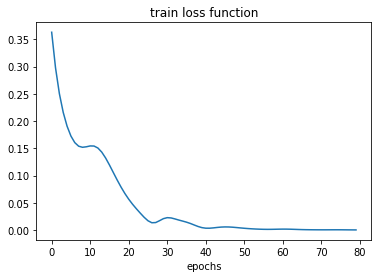

In [1462]:
def plot_results(loss, my_nn,name:str): #function to plot loss curve and learned function curve 
    
    # plot loss
    plt.figure()
    plt.plot(loss)
    plt.title(name+' loss function')
    plt.xlabel('epochs')

plot_results(train_loss,model,'train')

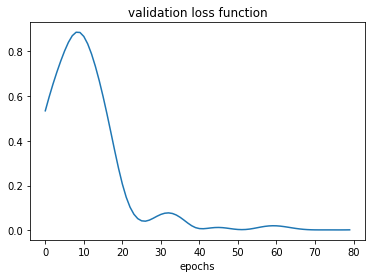

In [1463]:
plot_results(val_loss,model,'validation')

In [1464]:
pred=model(X_test)
pred=pred.detach().numpy()
                                                         
pred=pd.DataFrame(pred)
y_test=pd.DataFrame(y_test)


dates = pd.to_datetime(dates)

In [1465]:
fin=int(0.05*len(dates))+1
test_dates=dates[-fin:]

pred=pred.set_index(test_dates)

y_test=y_test.set_index(test_dates)

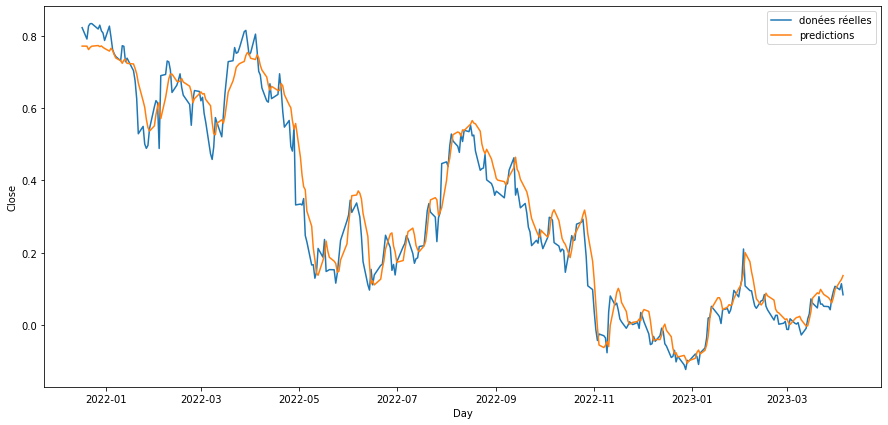

In [1466]:
fs=(15,7)
plt.figure(figsize=fs)

plt.plot(y_test.index, y_test, label='donées réelles')
plt.plot(pred.index, pred, label='predictions')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [1467]:
y_test=y_test.to_numpy().flatten()
pred=pred.to_numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))  # we try to output the close value at the real scale 
dummies[:, 0] = pred
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([165.25444355, 165.24618434, 164.35669083, 164.91024683,
       165.23196694, 165.39942991, 165.11412592, 165.28879208,
       164.94221653, 164.65693477, 163.96804111, 164.69400672,
       164.1262222 , 163.01770957, 162.17801587, 161.5124103 ,
       160.81262293, 161.63817705, 161.87452605, 160.79969499,
       160.65010659, 159.48559141, 158.08398245, 155.75096143,
       151.11711141, 149.4549872 , 146.39867953, 144.24815036,
       143.33052774, 144.65970465, 147.58627159, 149.70089599,
       150.65662992, 146.53531776, 151.98746312, 154.34114884,
       156.84345586, 158.04120797, 158.03471621, 156.19849275,
       156.02344864, 156.28034007, 156.90239305, 156.00221703,
       154.9074327 , 153.46450546, 150.63287496, 151.71391989,
       152.93334825, 153.45438987, 152.89224118, 153.01828583,
       151.4847296 , 149.87511751, 145.5755765 , 142.64420744,
       142.37721155, 145.34312367, 146.25028055, 145.34143959,
       147.24834431, 150.35287331, 153.38299162, 156.28

In [1468]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([170.01750073, 167.07899518, 170.41700525, 171.03700176,
       171.06849902, 169.66949677, 170.66099652, 169.20100618,
       168.64449887, 166.71699614, 170.40449416, 167.52200227,
       164.35699652, 163.25399744, 162.55399887, 161.48599305,
       165.36200225, 165.20700034, 161.21400606, 162.13799817,
       158.91749564, 156.29899833, 151.66749379, 142.64300691,
       144.54400347, 139.98599256, 138.87249717, 139.63749672,
       143.97799751, 149.57350074, 151.19349521, 150.61250484,
       138.84550467, 157.63949692, 157.93550009, 161.41349987,
       161.18950077, 159.0034948 , 153.29350203, 155.16700864,
       156.51049745, 158.10049531, 154.65249769, 152.60150144,
       150.19749346, 144.82699533, 151.35800132, 153.78849879,
       153.56300459, 151.1420002 , 152.05250301, 147.89849861,
       145.64100545, 137.45300252, 136.01449668, 139.27900757,
       146.81750371, 145.52450391, 141.8529963 , 147.36650214,
       153.10400152, 157.23899751, 161.25050554, 161.49

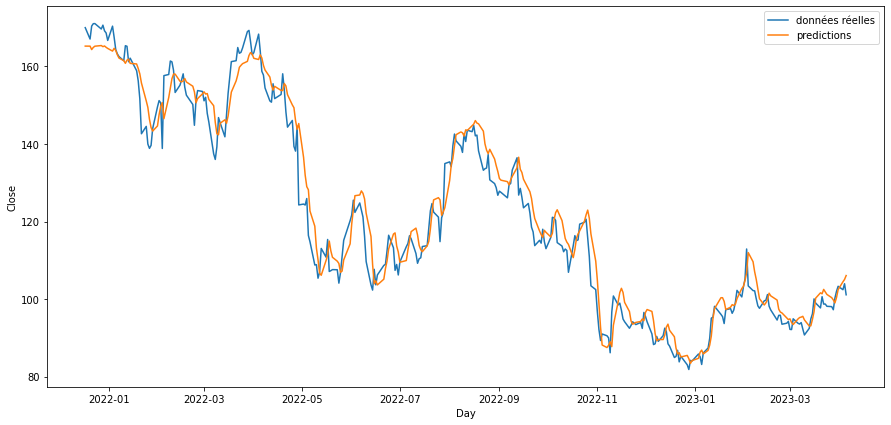

In [1469]:
fs=(15,7)
plt.figure(figsize=fs)

plt.plot(test_dates, new_y_test, label='données réelles')
plt.plot(test_dates, test_predictions, label='predictions')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()